# Assignment 2 - Machine Learning Basics

## *Nathan Scheperle*
Netid:  *nes31*

Github link: *Link to the github repo with your completed assignment*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. *Flexible* - A larger sample size allows for us to derive more robust estimates and therefore a more flexible model would be better.
2. *Inflexible* - With a small amount of data, we are at a greater risk of overfitting to the data we have observed.
3. *Flexible* - Non-linear relationships generally require more flexibility. Over simplifying the model of a complicated relationship would lead to high bias.
4. *Inflexible* - If the irreducible variance is high, we would not want to overfit to noisy data.


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** 

(i) *Regression* - The output variable is continuous.

(ii) *Inference* - We are interested in interpreting the model.

(iii) $n=500$, $p=3$

**(b)** 

(i) *Classification* - The output variable is categorical.

(ii) *Prediction*  - We are interested in predicting a future outcome based on previous data.

(iii) $n=20$, $p=13$

**(c)** 

(i) *Regression* - The output variable is continuous.

(ii) *Prediction* - We are interested in predicting a future outcome based on previous data.

(iii) $n=52$, $p=3$

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER:**

**(a)**

In [1]:
# (a) Write your own kNN classifier
import numpy as np
import pandas as pd
from scipy import stats

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.train_predictors = x
        self.train_labels = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i,point in x.iterrows():
            dist = np.linalg.norm(self.train_predictors.sub(point), axis=1)
            ind = np.argpartition(dist, k)[:k]
            y_hat.append(int(stats.mode(self.train_labels.iloc[ind])[0]))
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**(b)** and **(c)**

In [2]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
import time
from sklearn.neighbors import KNeighborsClassifier as sknn

# function to avoid copy-pasting code
def do_knn(dim='low'):
    # read in the data
    X_train = pd.read_csv('./data/A2_X_train_'+dim+'.csv', header=None)
    Y_train = pd.read_csv('./data/A2_Y_train_'+dim+'.csv', header=None)

    X_test = pd.read_csv('./data/A2_X_test_'+dim+'.csv', header=None)
    Y_test = pd.read_csv('./data/A2_Y_test_'+dim+'.csv', header=None)

    # my implementation of KNN
    start = time.time()
    knn = Knn()
    knn.fit(X_train, Y_train)

    k = 5
    y_hat = knn.predict(X_test, k)
    acc = accuracy(Y_test[0], y_hat)

    # print results
    print("Time [sec] (My %s-dimensional): %s" % (dim, time.time() - start))
    print("Accuracy (My %s-dimensional): %s%%" % (dim, acc*100))
    
    # sklearn's implmentation of KNN for comparison
    start = time.time()
    sk = sknn(n_neighbors = k)
    sk.fit(X_train, Y_train[0])
    sk.predict(X_test)
    sk_acc = sk.score(X_test, Y_test[0])
    
    # print results
    print("Time [sec] (sklearn %s-dimensional): %s" % (dim, time.time() - start))
    print("Accuracy (slearn %s-dimensional): %s%%" % (dim, sk_acc*100))
    print()
    

do_knn('low')
do_knn('high')


Time [sec] (My low-dimensional): 2.3237850666046143
Accuracy (My low-dimensional): 92.5%
Time [sec] (sklearn low-dimensional): 0.01595759391784668
Accuracy (slearn low-dimensional): 92.5%

Time [sec] (My high-dimensional): 2.35080885887146
Accuracy (My high-dimensional): 99.3%
Time [sec] (sklearn high-dimensional): 0.9245259761810303
Accuracy (slearn high-dimensional): 99.3%



**(d)** In both the low- and high-dimensional cases, my code returned identical classification results, as shown by the accuracy above. However, my code ran in 3x-10x slower than the sklearn implmentation. I believe this is due to my distance calculation not being fully vectorized.

**(e)** A model having slow prediction time means it is not suited to problems where we want to make a near real-time decision or inference. For example, if a model can predict what the weather will be in 24 hours with 99% accuracy, it's not much use if it takes 25 hours to perform the calculation.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER:**

**(a)**

In [3]:
import numpy as np
from statistics import mode

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

colors = {'r':'Red', 'b':'Blue'}
# Part a
test_x = np.array([0,0,0])

def euc_dist(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist


df = pd.DataFrame(data=X, index=range(1,len(X)+1), columns=['$x_1$','$x_2$','$x_3$'])
df['dist'] = np.apply_along_axis(euc_dist, 1, X, test_x)
df['y'] = y
df = df.replace({'y':colors})
df.index.names = ['Obs.']

df

,$x_1$,$x_2$,$x_3$,dist,y
Obs.,,,,,
1,0,3,0,3.000000,Red
2,2,0,0,2.000000,Red
3,0,1,3,3.162278,Red
4,0,1,2,2.236068,Blue
5,-1,0,1,1.414214,Blue
6,1,1,1,1.732051,Red


**(b)**
With $k=1$, we assign our test point the label of the closest point.

In [4]:
# Part b
k = 1
# take the mode of the labels of the first k points after sorting
y_hat = mode(df.sort_values(by=['dist'])[:k]['y'])
print("Prediction for k = 1 at point {}: y = {}".format(tuple(test_x), y_hat))


Prediction for k = 1 at point (0, 0, 0): y = Blue


**(c)**
With $k=3$, we assign our test point the label the most frequent label of the 3 closest points.

In [5]:
# Part c
k = 3
# take the mode of the labels of the first k points after sorting
y_hat = mode(df.sort_values(by=['dist'])[:k]['y'])
print("Prediction for k = 3 at point {}: y = {}".format(tuple(test_x), y_hat))

Prediction for k = 3 at point (0, 0, 0): y = Red


**(d)** If the Bayes decision boundary is non-linear, we would expect the best $k$ to be small. K-nearest Neighbors models are more flexible with small values of $k$ and therefore will allow for more variance in the data as would be the case with a non-linear relationship.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as sknn
from itertools import product
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')
plt.set_cmap('viridis')


# Part (a)
train_X, train_Y = make_moons(n_samples=1000, noise=0.35)

**(b)**

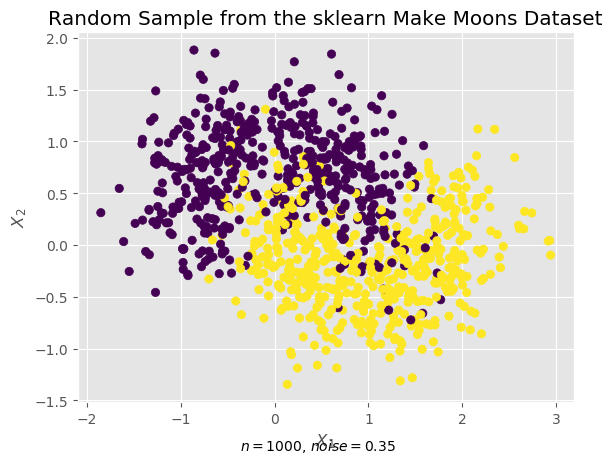

In [20]:
# Part (b)
fig = plt.figure()
plt.scatter(train_X[:,0], train_X[:,1], c=train_Y)
plt.title("Random Sample from the sklearn Make Moons Dataset")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
fig.text(.5, .01, '$n=1000$, $noise=0.35$', ha='center')
plt.show()

**(c)**

In [8]:
# Part (c)
# create lists to store each dataset and KNN fit
datasets = []
fits = []
n = 100
for i in range(3):
    # uniformly select a random 100 numbers between 0 and 1000 to use as indices for selection from training dataset
    sample_ind = np.random.choice(range(0,1000), n)
    X_sample = train_X[sample_ind]
    Y_sample = train_Y[sample_ind]

    for k in [1, 25, 50]:
        # create the model object and fit the sampled data
        knn = sknn(n_neighbors = k)
        knn.fit(X_sample, Y_sample)

        # append the model to our list of models
        fits.append(knn)
    # create a dataframe from the sample then add it to our list of datasets   
    df = pd.DataFrame(data=X_sample, columns = ['x1', 'x2'])
    df['y'] = Y_sample
    datasets.append(df)

**(d)**

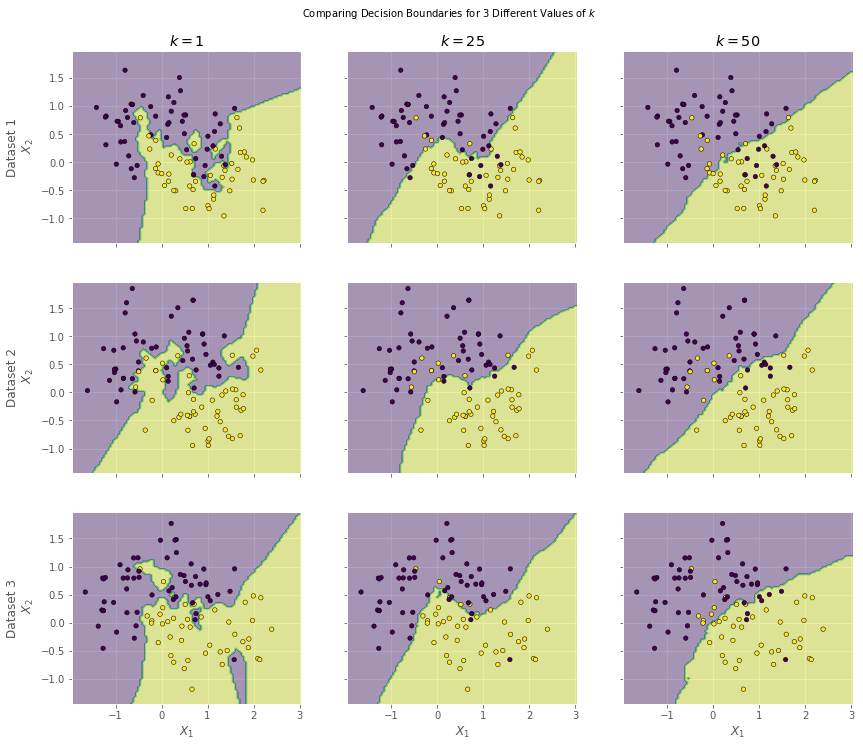

In [9]:
# Part d
# create a meshgrid over the range and domain of data
xx, yy = np.meshgrid(np.arange(train_X[:,0].min()-.1, 
                               train_X[:,0].max()+.1, 
                               step=(abs(train_X[:,0].min()) + abs(train_X[:,0].max())+.1) / 100),
                       np.arange(train_X[:,1].min()-.1, 
                                 train_X[:,1].max()+.1, 
                                 step=(abs(train_X[:,1].min()) + abs(train_X[:,1].max())) / 100))
# create grid axis
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(14, 12))
fig.text(.5, .92, "Comparing Decision Boundaries for 3 Different Values of $k$", ha='center')
for axis, col in zip(ax[0], ['$k=1$','$k=25$','$k=50$']):
    axis.set_title(col)
    
for axis, row in zip(ax[:,0], ['Dataset 1','Dataset 2','Dataset 3']):
    axis.set_ylabel(row+"\n $X_2$", size='large')
    
for axis in ax[2]:
    axis.set_xlabel('$X_1$')
    
subplot_indexes = list(product([0,1,2],[0,1,2]))
# loop through each dataset-fit combination, assign to grid location, and plot
for i in range(9):
    idx = subplot_indexes[i]
    model = fits[i]
    dataset = datasets[int(i/3)]

    # predict lables for each grid value
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    ax[idx[0], idx[1]].contourf(xx, yy, preds, alpha=0.4)
    ax[idx[0], idx[1]].scatter(dataset['x1'], dataset['x2'], c=dataset['y'], s=20, edgecolor='k')

plt.show()

**(e)** 

At $k=1$ the boundary almost exactly outlines each point, obviously overfitting to the data. With each resampling, the decision boundary for $k=1$ varies considerably.

At $k=50$ the boundary is very rigid and performs approximately equally well on each of the three datasets, but not very accurately on any of them. When resampling, this boundary is relatively static in shape.

At $k=25$ the boundary is moderately flexible and performs fairly well on all three datasets. This appears to be the best overall fit of the three. It displays a slight curving tendancy that we would expect since we know the underlying distribution. The $k=50$ fits do not display this curve shape because they are too inflexible while the $k=1$ fits are too flexible.

**(f)** 

The $k=1$ examples have high variance: the predictions each model outputs are highly sensitive to the input data. For each new training dataset, we get substantially different estimations of the decision boundary. The $k=50$ examples have high bias and low variance: they are underfitting to the input data. This is because a much simpler model is being fit to the data than its true distribution. Each training set results in a fairly similar estimation.


## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as sknn
from itertools import product

# Part a 
test_X, test_Y = make_moons(n_samples=1000, noise=0.35)

**(b)**

In [11]:
# Part b
import time
start = time.time()
# create dictionary to store k values and associated errors
error = {'k':[], 'Train Error':[], 'Test Error':[]}
for k in range(1,500+1):
    # create the knn object and fit it using the training data from the last question
    knn = sknn(n_neighbors = k)
    knn.fit(train_X, train_Y)
    
    # predict the labels for the training dataset then score the predictions
    train_preds = knn.predict(train_X)
    train_score = knn.score(train_X, train_Y)
    
    # predict the labels for the testing dataset then score the predictions
    test_preds = knn.predict(test_X)
    test_score = knn.score(test_X, test_Y)
    
    # add k, train error, and test error to the dictionary
    error['k'].append(k)
    error['Train Error'].append(1-train_score)
    error['Test Error'].append(1-test_score)
# convert the dictionary to a Pandas dataframe
error_df = pd.DataFrame.from_dict(error)
print("Time to fit 500 KNN = {}".format(time.time() - start))

Time to fit 500 KNN = 204.69426369667053


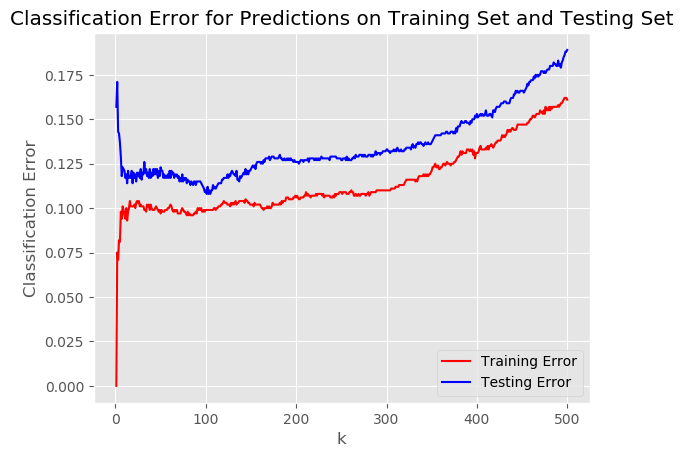

In [21]:
# plot the errors vs. k
plt.plot(error_df['k'], error_df['Train Error'], color='red', label='Training Error')
plt.plot(error_df['k'], error_df['Test Error'], color='blue', label="Testing Error")
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.title("Classification Error for Predictions on Training Set and Testing Set")
plt.legend()
plt.show()


**(c)** Training error starts at zero, which makes sense by the definition of how we train KNN. Training error is consistently below testing error for all values of $k$, which is intuitive because this data was used to fit the model. Lastly, testing error decreases rapidly from $0$ to around $5$ before bottoming out and then beginning to steadily increase as $k$ increases.

**(d)** Higher values of $k$ represent higher bias and lower variance, lower values of $k$ represent lower bias and higher variance. This means that at high values of $k$ our model does not vary much when given new data, and thus may be underfitting, while at low values of $k$ our model will change considerably when fit with new data and would be overfitting to the data seen so far.

**(e)**

In [13]:
# Part e
min_idx = error_df['Test Error'].idxmin()
min_k = error_df['k'].iloc[min_idx]
min_test_error = error_df['Test Error'].iloc[min_idx]
print("Test error is minimized at k = %s and has a value of %s" % (min_k, min_test_error))

Test error is minimized at k = 101 and has a value of 0.10799999999999998


**(f)**

Model flexibility is controlled by the tuning parameters for the given model. For example, in linear regression a model with more predictor variables is more flexible.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [14]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,
           1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,
           2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,
           2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,
           82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,
           106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,
           23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,
           155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

**(a)**

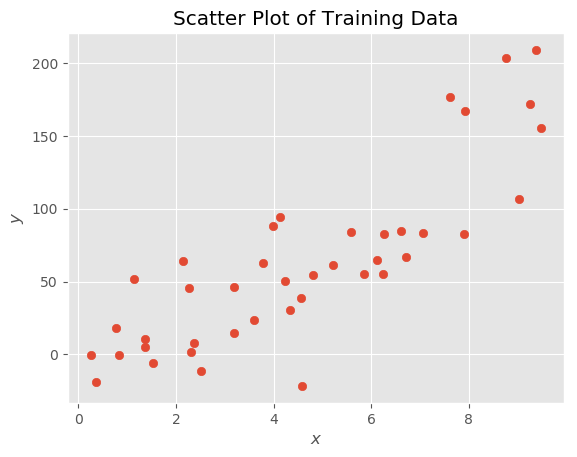

In [22]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score, mean_squared_error
# Part a
plt.scatter(x_train, y_train)
plt.title("Scatter Plot of Training Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

**(b)**

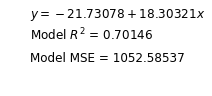

In [16]:
# Part b
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
reg = lr().fit(x_train, y_train)

train_preds = reg.predict(x_train)
R2 = r2_score(y_train, train_preds)
MSE = mean_squared_error(y_train, train_preds)
plt.rcParams['figure.figsize'] = 1,1
plt.text(0,1,"$y = %.5f + %.5fx$" % (reg.intercept_[0], reg.coef_[0][0]), fontsize='large')
plt.text(0, 0.6, "Model $R^2$ = %.5f" % (R2), fontsize='large')
plt.text(0, 0.2, "Model MSE = %.5f" % (MSE), fontsize='large')
plt.axis('off')
plt.show()

**(c)**

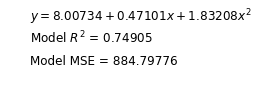

In [17]:
# Part c
df_train = pd.DataFrame(data=x_train, columns=['x'])
df_train['y'] = y_train
df_train['$x^2$'] = df_train['x']**2
reg2 = lr().fit(df_train[['x', '$x^2$']], df_train['y'])

train_preds2 = reg2.predict(df_train[['x', '$x^2$']])
R2_2 = r2_score(df_train['y'], train_preds2)
MSE2 = mean_squared_error(df_train['y'], train_preds2)

plt.rcParams['figure.figsize'] = 1,1
plt.text(0,1,"$y = %.5f + %.5fx + %.5f x^2$" % (reg2.intercept_, reg2.coef_[0], reg2.coef_[1]), fontsize='large')
plt.text(0, 0.6, "Model $R^2$ = %.5f" % (R2_2), fontsize='large')
plt.text(0, 0.2, "Model MSE = %.5f" % (MSE2), fontsize='large')
plt.axis('off')
plt.show()
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')

**(d)**

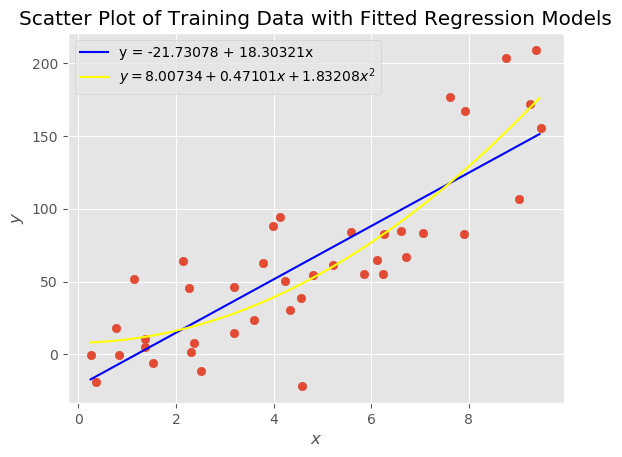

In [18]:
# Part d
#plt.style.use('ggplot')
x_range = np.arange(x_train.min(), x_train.max(), .1).reshape(-1,1)
x2_range = x_range**2
y_hat1 = reg.predict(x_range)
y_hat2 = reg2.predict(np.concatenate([x_range, x2_range], axis=1))
plt.scatter(x_train, y_train)
plt.plot(x_range, y_hat1, color='blue', 
         label = "y = %.5f + %.5fx" % (reg.intercept_[0], reg.coef_[0][0]))
plt.plot(x_range, y_hat2, color='yellow', 
         label="$y = %.5f + %.5fx + %.5f x^2$" % (reg2.intercept_, reg2.coef_[0], reg2.coef_[1]))
plt.title("Scatter Plot of Training Data with Fitted Regression Models")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

**(e)**

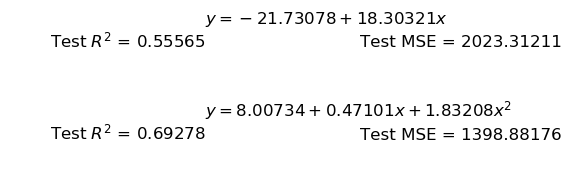

In [19]:
# Part e
df_test = pd.DataFrame(data=np.array(x_test).reshape(-1,1), columns=['x'])
df_test['y'] = np.array(y_test).reshape(-1,1)
df_test['$x^2$'] = df_test['x']**2

test_preds1 = reg.predict(df_test[['x']])
test_R2_1 = r2_score(df_test['y'], test_preds1)
test_MSE_1 = mean_squared_error(df_test['y'], test_preds1)

test_preds2 = reg2.predict(df_test[['x', '$x^2$']])
test_R2_2 = r2_score(df_test['y'], test_preds2)
test_MSE_2 = mean_squared_error(df_test['y'], test_preds2)

plt.rcParams['figure.figsize'] = 2,1.5
plt.text(1, 1, "$y = %.5f + %.5fx$" % (reg.intercept_[0], reg.coef_[0][0]), fontsize='large')
plt.text(0, .8, "Test $R^2$ = %.5f" % (test_R2_1), fontsize='large')
plt.text(2, 0.8, "Test MSE = %.5f" % (test_MSE_1), fontsize='large')

plt.text(1,.2,"$y = %.5f + %.5fx + %.5f x^2$" % (reg2.intercept_, reg2.coef_[0], reg2.coef_[1]), fontsize='large')
plt.text(0, 0, "Test $R^2$ = %.5f" % (test_R2_2), fontsize='large')
plt.text(2, 0, "Test MSE = %.5f" % (test_MSE_2), fontsize='large')
plt.axis('off')
plt.show()

**(f)**
The second model that contains a squared term performs better on the test data. The transformed model appears to better model the true relationship of the variables. The greater flexibility of the model reduces bias compared to the more rigid, strictly linear model.

**(g)**
Because the second model is more flexible and therefore has higher variance, if the test dataset had been significantly different from the training dataset this model likely would perform worse than the strictly linear model.